
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise-
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [ ]:
def linear_interpolation(x0, y0, x1, y1, x):
  return y0 + ((x-x0)*(y1-y0))/(x1-x0)
x0=1
y0=3
x1=4
y1=12
x=2.5
print(linear_interpolation(x0, y0, x1, y1, x))

7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise-
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [ ]:
import math
import numpy as np
def numerical_differentiation(x, h):
  foward_diffrence=(math.sin(x+h)-math.sin(x))/h
  backward_diffrence=(math.sin(x)-math.sin(x-h))/h
  central_diffrence=(math.sin(x+h)-math.sin(x-h))/(2*h)
  return foward_diffrence, backward_diffrence, central_diffrence
x=math.pi/4
h=.01
print((numerical_differentiation(x, h)))





(0.7035594916892096, 0.710630500575693, 0.7070949961324513)



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions.


### Exercise-
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi).

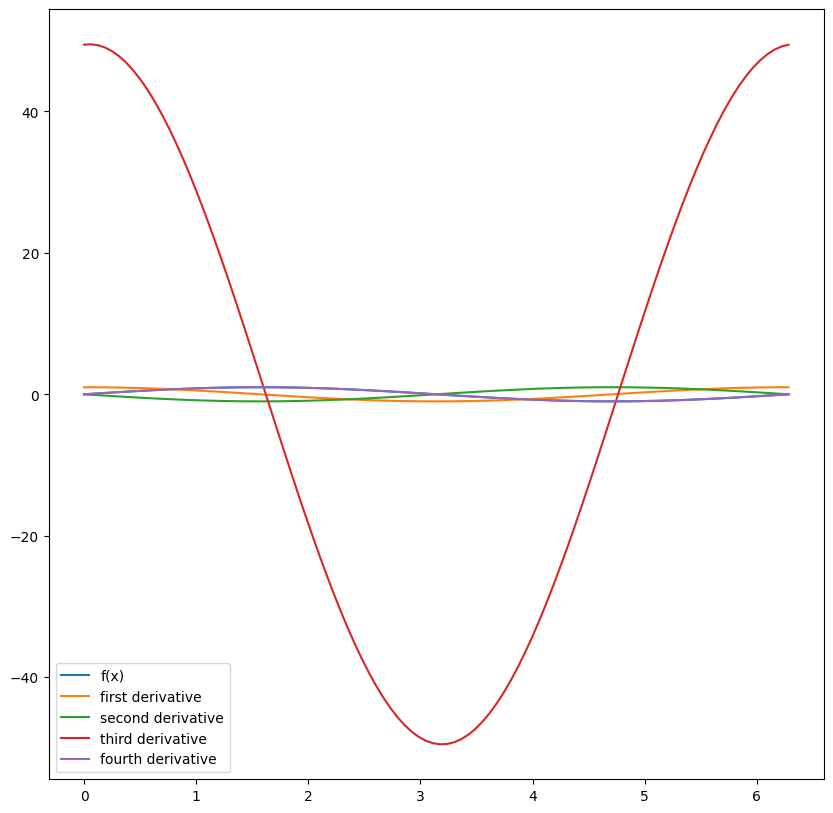

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
def f(x):
  return np.sin(x)
def first_derivative(f,x,h):
  return (f(x+h)-f(x-h))/(2*h)
def second_derivative(f,x,h):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)
def third_derivative(f,x,h):
  return (f(x+h)-2*f(x)+2*f(x-h)-f(x-2*h))/(2*h**3)
def fourth_derivative(f,x,h):
  return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/(h**4)

plt.figure(figsize=(10,10))
x=np.linspace(0,2*np.pi,100)
plt.plot(x,f(x),label="f(x)")
plt.plot(x,first_derivative(f,x,h),label="first derivative")
plt.plot(x,second_derivative(f,x,h),label="second derivative")
plt.plot(x,third_derivative(f,x,h),label="third derivative")
plt.plot(x,fourth_derivative(f,x,h),label="fourth derivative")

plt.legend()

plt.show()


### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them.

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10
- w = 5
- E = 200e9
- I = 1e-6

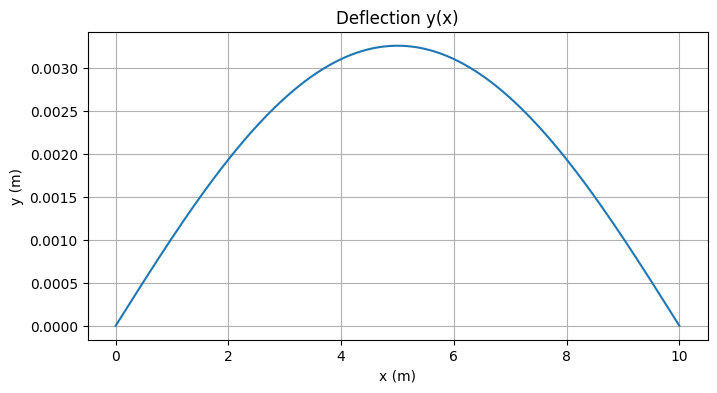

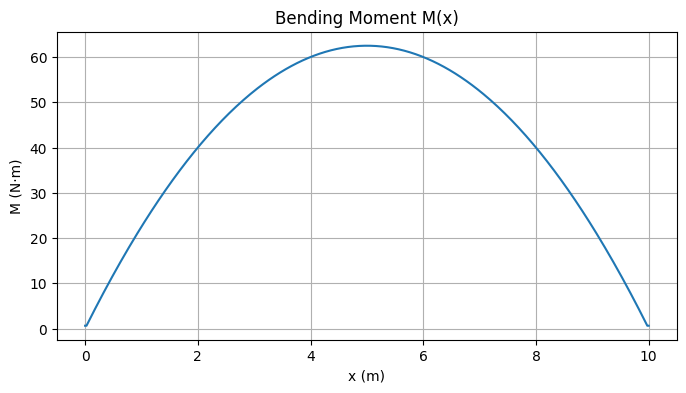

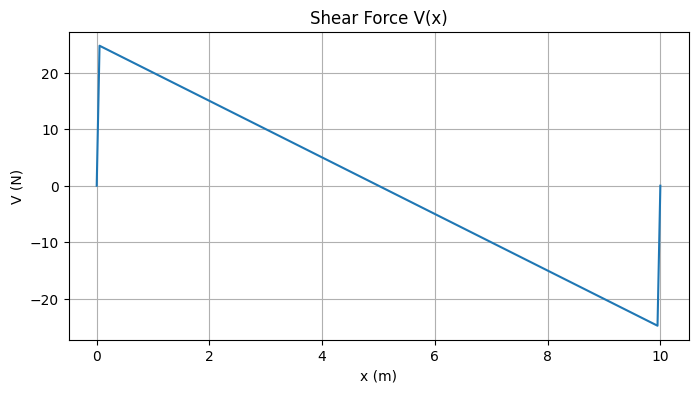

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

x = np.linspace(0, L, 400)
dx = x[1] - x[0]

def y_deflection(x):
    return (w / (24 * E * I)) * x * (L**3 - 2*L*x**2 + x**3)

def first_derivative(y, dx):
    dy = np.zeros_like(y)
    dy[1:-1] = (y[2:] - y[:-2]) / (2*dx)
    dy[0] = (y[1] - y[0]) / dx
    dy[-1] = (y[-1] - y[-2]) / dx
    return dy

def second_derivative(y, dx):
    d2y = np.zeros_like(y)
    d2y[1:-1] = (y[2:] - 2*y[1:-1] + y[:-2]) / (dx**2)
    d2y[0] = (y[2] - 2*y[1] + y[0]) / (dx**2)
    d2y[-1] = (y[-1] - 2*y[-2] + y[-3]) / (dx**2)
    return d2y
y = y_deflection(x)
dy_dx = first_derivative(y, dx)
d2y_dx2 = second_derivative(y, dx)

M = -E * I * d2y_dx2
V = first_derivative(M, dx)

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Deflection y(x)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x, M)
plt.title("Bending Moment M(x)")
plt.xlabel("x (m)")
plt.ylabel("M (N·m)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x, V)
plt.title("Shear Force V(x)")
plt.xlabel("x (m)")
plt.ylabel("V (N)")
plt.grid(True)
plt.show()




## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

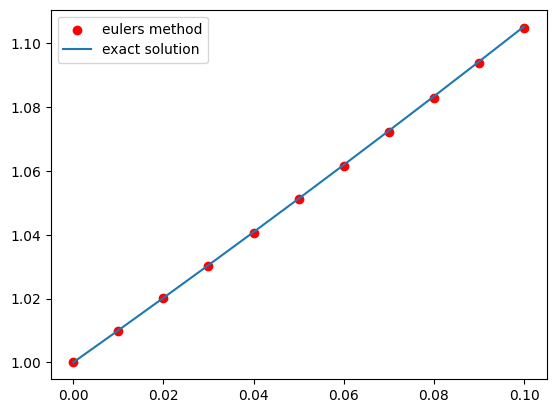

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h=.01 #step size
num_steps=10 # number of steps
def f(x,y): #defining function
  return np.exp(x)
# initial conditions
x0=0
y0=1
#Data storage
xs=[x0]
ys=[y0]
#eurler method loop
for i in range(num_steps):
  y0+=h*f(x0,y0) #euler method formula
  x0+=h #updates x to the next x

  #newly calculated x and y are appended to their respective list
  xs.append(x0)
  ys.append(y0)
#plotting
plt.scatter(xs,ys,label="eulers method",color='red')
plt.plot(xs,np.exp(xs),label="exact solution",)
plt.legend()

plt.show()



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

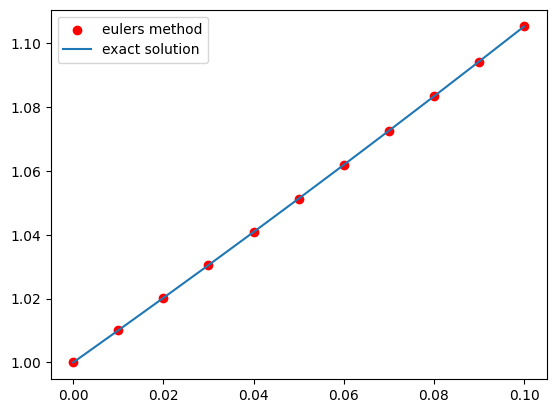

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h=.01 #step size
num_steps=10 # number of steps
def f(x,y): #defining function
  return np.exp(x)
# initial conditions
x0=0
y0=1
#Data storage
xs=[x0]
ys=[y0]
#eurler method loop
for i in range(num_steps):
  k1 =h*f(x0,y0)
  k2=h*f(x0+h/2,y0+h/2)
  k3=h*f(x0+h/2,y0+h/2)
  k4=h*f(x0+h,y0+k3)
  y0+= (k1+2*k2+2*k3+k4)/6 #euler method formula
  x0+=h #updates x to the next x

  #newly calculated x and y are appended to their respective list
  xs.append(x0)
  ys.append(y0)

#plotting
plt.scatter(xs,ys,label="eulers method",color='red')
plt.plot(xs,np.exp(xs),label="exact solution",)
plt.legend()

plt.show()